# 1. Sample Versus Population

A population is a well-defined set of individuals, events, or objects. a sample is a selection of individuals, events, or objects taken from a well-defined population.

* A sample is generally taken from a population with each individaul, event, or objecct being independent and having an equally likel chance of selection. 
* The sample average is an example of a random sample etimate of a poppulation value, eg. population mean.

* Population characteristics or parameters are inferred from sample estimates, which are called statistics.
    * Example of population parameters are population proportion, population mean, population correlation.
    
* Because a sample is only a part of the population, how can the smaple estimate accurately reflect the population characteristic? There is an expectation taht the sample estimate will be close to the population value if the sample is representative of the population.
The difference b/w the sample estimate and the population values is called **sample error**.

* In a random sample all objects have an equal chance of being selected from the population. if the sample is reasonably large, this equally likely chance of any individual, event, or object being selected makes it likely that the random sample will represent the population well.

* The difference b/w a known population value and a random sample value cab be observed. Different samples may lead to different sample estimates of population parameters, so most estimates from samples contins some error of estimation or sampling error.

* Basically, a random sample error is part of a population parameters or characteristics.

* Different random samples lead to different sample estimates.

**Task: Simulate a program to check the probability of voted people form a population to win the election**

To Simulate the probability of voted people we need to take sample of some people from population.

1. we will genereate a random sample with a proposition of population.
2. we will consider the PropPop is the real probability (theoritical probability) so we need to generate samples and need to check that our proposition of people is approximated to the real probability.
3. we will perform this approximation on different sample size.

In [1]:
# setting a random seed
set.seed(13579)

In [22]:
# we will make a function which will take the sequence of samplesize and population proposition.
FavorProp  = function(Population, ProPop,probabilities , SampleSizes = 100, replacement=TRUE){
    
    # Now we need to generate a random sample from the population (0, 1 )
    # 0 is used for whoes are not in favor
    # 1 is used for whoes are in favor
    
    SimData = NULL  # to store all the final result 
    for (SampleSize in SampleSizes){
        
        # NOw need to generate random samples uing SampleSize
        SampleData = sample(x=Population, prob = probabilities, size=SampleSize, replace= replacement)
        
        # Now we need to add all the data to get the proposition of people whoes are in our favor
        InFavor = sum(SampleData)
        
        # Now we need to get the proposition probability 
        InFavorProb = round(InFavor/SampleSize, 3)
        
        # Now we need to count the error with real probability and approximated probability
        Error = ProPop - InFavorProb
        
        # Now we need to combine  SAmpleSize, InFavor, InFavorProb(Sample prop), True prop
        FavorDataRow = c(SampleSize, InFavor, InFavorProb, ProPop, Error)
        
        
        if (is.null(SimData)){
            
            # if SimData is null then we need to initiate it
            SimData = rbind(FavorDataRow)
        }
        else{
            # if SimData is having some data already then we need to apped the next row
            SimData = rbind(SimData, FavorDataRow)
        }
    }
    # before returning we need to rename all the data column names and row names.
    colnames(SimData) = c("SampleSize","No.in Favor", "Sample Prop.", "True Prop", "Est. Error")
    rownames(SimData) = 1:length(SampleSizes)
    # Now finally we need to return the final data.
    data.frame(SimData)
}

In [23]:
FavorData = FavorProp(Population = c(0,1), ProPop=0.677, probabilities = c(1-.677,.677), SampleSizes = seq(50,1000,100))

In [24]:
FavorData

SampleSize,No.in.Favor,Sample.Prop.,True.Prop,Est..Error
50,39,0.780,0.677,-0.103
150,108,0.720,0.677,-0.043
250,171,0.684,0.677,-0.007
350,224,0.640,0.677,0.037
450,321,0.713,0.677,-0.036
550,371,0.675,0.677,0.002
650,415,0.638,0.677,0.039
750,517,0.689,0.677,-0.012
850,586,0.689,0.677,-0.012
950,658,0.693,0.677,-0.016


In [25]:
set.seed(13579)
FavorData = FavorProp(Population = c(0,1), ProPop=0.677, probabilities = c(1-.677,.677), 
                      SampleSizes = c(10, 100, 500, 1000, 1500))
FavorData

SampleSize,No.in.Favor,Sample.Prop.,True.Prop,Est..Error
10,6,0.600,0.677,0.077
100,68,0.680,0.677,-0.003
500,340,0.680,0.677,-0.003
1000,681,0.681,0.677,-0.004
1500,1011,0.674,0.677,0.003


In [29]:
set.seed(13579)
FavorData = FavorProp(Population = c(0,1), ProPop=0.098, probabilities = c(1-0.098,0.098), 
                      SampleSizes = seq(500,50000,500))
#FavorData

In [27]:
class(FavorData)

[1] "data.frame"

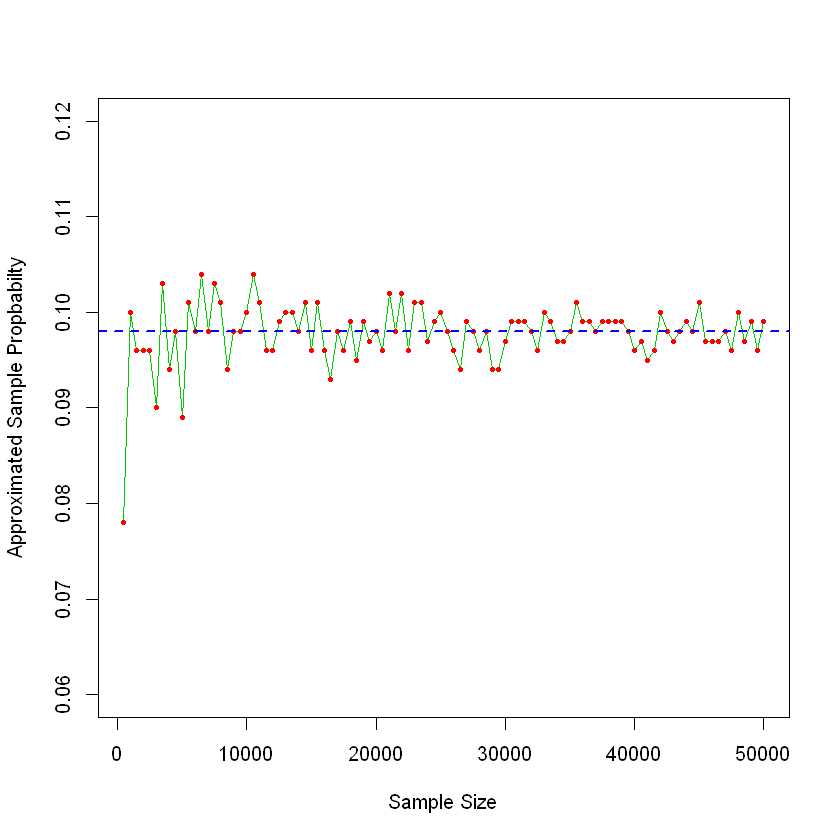

In [37]:
plot(x = FavorData$SampleSize, y= FavorData$Sample.Prop., xlab="Sample Size", ylab="Approximated Sample Propbabilty", col=3, type='l',
    ylim= c(0.06,0.12))
points(x = FavorData$SampleSize, y= FavorData$Sample.Prop., pch=16, cex=0.5, col=2)
abline(a=1, b=0, h=0.098, lty=2, col=4, lwd=2)

From the Graph of simulation we can say that by increasing the sample size we can reach upto true prop. value. this a simple random sampling exercise. we will see one more exercise.

___

# 2. Generating Random Numbers